# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lecture 13: Classification with KNN Demo


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---

In [1]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

---

In [3]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model as lm
import sklearn as sk
import sklearn.neighbors




In [3]:
df_heart = pd.read_csv('Heart.csv')
df_heart.head()


Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

/Users/krader/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


[<matplotlib.text.Text at 0x119bbca90>, <matplotlib.text.Text at 0x119ba0908>]

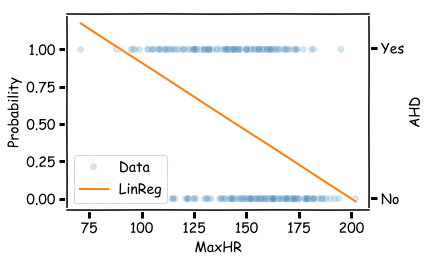

In [4]:
from sklearn import linear_model

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("MaxHR")
host.set_ylabel("Probability")


par1.set_ylabel("AHD")



color1 = plt.cm.viridis(0)

data_x = df_heart.MaxHR
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)

regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(data_x.reshape(-1,1), data_y.reshape(-1,1))

# Make predictions using the testing set
x=np.linspace(np.min(data_x),np.max(data_x))
y_ = regr.predict(x.reshape(-1,1))

host.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
host.plot(x, y_, label='LinReg')
host.legend(loc=3)

labels = ['No', 'Yes']

# You can specify a rotation for the tick labels in degrees or with keywords.
par1.set_yticks( [0.061, 0.83])
par1.set_yticklabels(labels)

In [11]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(C=100000, fit_intercept=True)
logreg.fit(data_x.values.reshape(-1,1), data_y)


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04326016]]
Estimated beta0: 
 [ 6.30193148]


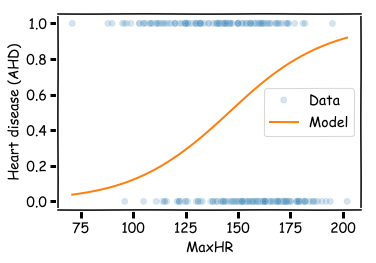

In [6]:

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
y_ = logreg.predict_proba(x.reshape(-1,1))[:,0]
plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,y_, label='Model')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")



plt.savefig('FittingLogR2.png', dpi=300, transparent=True)

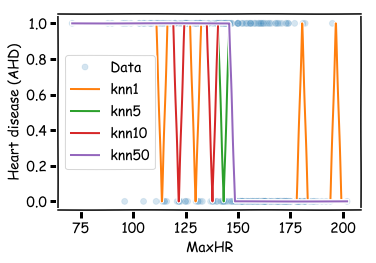

In [19]:
from sklearn import neighbors 

data_x = df_heart.MaxHR
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)


knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn50 = neighbors.KNeighborsClassifier(n_neighbors=50)

knn1.fit(data_x.values.reshape(-1,1), data_y);
knn5.fit(data_x.values.reshape(-1,1), data_y);
knn10.fit(data_x.values.reshape(-1,1), data_y);
knn50.fit(data_x.values.reshape(-1,1), data_y);


fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
yhat1 = knn1.predict(x.reshape(-1,1))
yhat5 = knn5.predict(x.reshape(-1,1))
yhat10 = knn10.predict(x.reshape(-1,1))
yhat50 = knn50.predict(x.reshape(-1,1))

plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,yhat1, label='knn1')
plt.plot(x,yhat5, label='knn5')
plt.plot(x,yhat10, label='knn10')
plt.plot(x,yhat50, label='knn50')

plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")


In [25]:
#two predictors
from sklearn import neighbors 

knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn50 = neighbors.KNeighborsClassifier(n_neighbors=50)

data_x = df_heart[['MaxHR','RestBP']]
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)

knn1.fit(data_x, data_y);
knn5.fit(data_x, data_y);
knn10.fit(data_x, data_y);
knn50.fit(data_x, data_y);

print(knn1.score(data_x, data_y))
print(knn5.score(data_x, data_y))
print(knn10.score(data_x, data_y))
print(knn50.score(data_x, data_y))

0.960396039604
0.712871287129
0.716171617162
0.706270627063


In [ ]:
#Don't forget to split into train and "test" to evaluate what k is best!